<a href="https://colab.research.google.com/github/PyKnight-vedant/CommunityClassroom/blob/main/Medical_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jan 14 10:33:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pyknight73
Your Kaggle Key: ··········


100%|██████████| 714M/714M [00:36<00:00, 20.7MB/s]


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
mask_list=[]
mri_list=[]
import os
for dirname, _, filenames in os.walk('/content/lgg-mri-segmentation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if "_mask" in filename:
            mask_list.append(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_5_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_23_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_3_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_21_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_26_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_22_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_10.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_31_mask.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_11.tif
/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_21.tif
/conte

In [5]:
!pip install scikit-image


In [6]:
import os
import tensorflow
import numpy as np
from skimage import io

In [7]:
mask_list

['/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_6_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_43_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_40_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_2_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_15_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_16_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_45_mask.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_39_mask.tif',
 '/content/lgg-mri-segmentation/lg

In [8]:
len(mask_list)

7858

In [9]:
for dir in mask_list:
    dir1=dir.replace("_mask","")
    mri_list.append(dir1)

In [10]:
mri_list

['/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_6.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_43.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_40.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_2.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_15.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_16.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_45.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_39.tif',
 '/content/lgg-mri-segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5T

In [11]:
from skimage import io
img=io.imread(mri_list[0])

In [12]:
l1=[]
for i in range(0, len(mri_list)):
    img=io.imread(mri_list[0])

    if img.shape not in l1:
        l1.append(img.shape)
l2=[]
for i in range(0, len(mask_list)):
    img=io.imread(mask_list[0])

    if img.shape not in l2:
        l2.append(img.shape)


In [13]:
l1

[(256, 256, 3)]

In [14]:
l2

[(256, 256)]

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


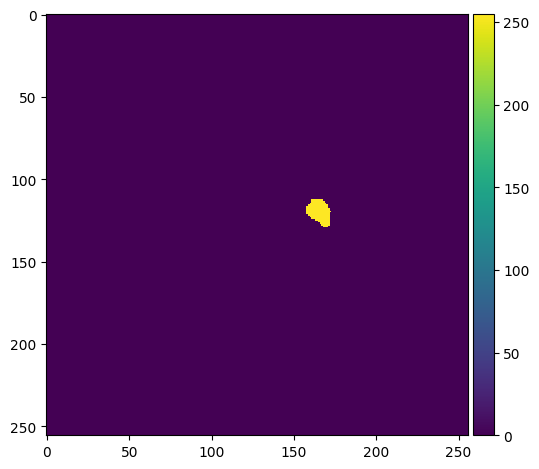

In [15]:
import matplotlib.pyplot as plt
io.imshow(mask_list[2])
plt.show()

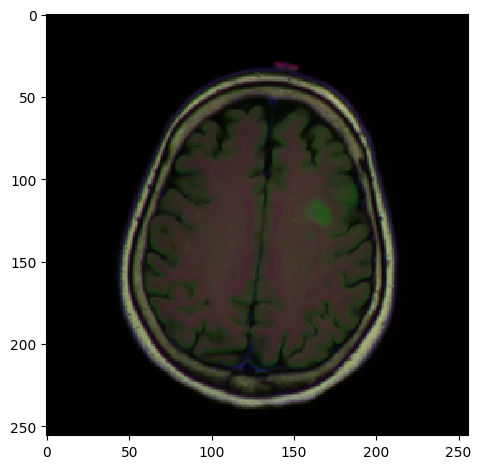

In [16]:
io.imshow(mri_list[2])
plt.show()

In [17]:
image=io.imread(mri_list[2])

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Lambda, Dropout, Conv2DTranspose, BatchNormalization

def unet(input_shape=image.shape):
    input=Input(input_shape)

    func=Lambda(lambda x: x/255)(input)

    # encoder block
    c1=Conv2D(64,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(func)
    c1=BatchNormalization(axis=3)(c1)
    c1=Dropout(0.1)(c1)
    c1=Conv2D(64,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(c1)
    c1=BatchNormalization(axis=3)(c1)
    p1=MaxPooling2D(pool_size=(2, 2))(c1)

    c2=Conv2D(128,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(p1)
    c2=BatchNormalization(axis=3)(c2)
    c2=Dropout(0.1)(c2)
    c2=Conv2D(128,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(c2)
    c2=BatchNormalization(axis=3)(c2)
    p2=MaxPooling2D(pool_size=(2, 2))(c2)

    c3=Conv2D(256,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(p2)
    c3=BatchNormalization(axis=3)(c3)
    c3=Dropout(0.1)(c3)
    c3=Conv2D(256,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(c3)
    c3=BatchNormalization(axis=3)(c3)
    p3=MaxPooling2D(pool_size=(2, 2))(c3)

    c4=Conv2D(512,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(p3)
    c4=BatchNormalization(axis=3)(c4)
    c4=Dropout(0.1)(c4)
    c4=Conv2D(512,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(c4)
    c4=BatchNormalization(axis=3)(c4)
    p4=MaxPooling2D(pool_size=(2, 2))(c4)

    c5=Conv2D(1024,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(p4)
    c5=BatchNormalization(axis=3)(c5)
    c5=Dropout(0.1)(c5)
    c5=Conv2D(1024,(3,3), activation='relu', kernel_initializer="he_normal" ,padding='same')(c5)
    c5=BatchNormalization(axis=3)(c5)

    # decoder block
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = BatchNormalization(axis=3)(c6)
    c6 = Dropout(0.1)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    c6 = BatchNormalization(axis=3)(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = BatchNormalization(axis=3)(c7)
    c7 = Dropout(0.1)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    c7 = BatchNormalization(axis=3)(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = BatchNormalization(axis=3)(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    c8 = BatchNormalization(axis=3)(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = BatchNormalization(axis=3)(c9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    c9 = BatchNormalization(axis=3)(c9)

    output=Conv2D(1,(1,1),activation="sigmoid")(c9)

    return Model(inputs=[input], outputs=[output])


In [19]:
model = unet()

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['lambda[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                               

In [21]:
from sklearn.model_selection import train_test_split
df = pd.DataFrame(data={"filename": mri_list, 'mask' : mask_list})
df_train, df_test = train_test_split(df,test_size = 0.1)
df_train, df_val = train_test_split(df_train,test_size = 0.2)
print(df_train.values.shape)
print(df_val.values.shape)
print(df_test.values.shape)

(5657, 2)
(1415, 2)
(786, 2)


In [22]:
# From: https://github.com/zhixuhao/unet/blob/master/data.py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1):
    '''
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "filename",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [29]:
EPOCHS = 42
BATCH_SIZE = 10
im_width = 256
im_height = 256

In [24]:
from tensorflow.keras import backend as K

smooth = 100

def dice_coef(y_true, y_pred):
    """
    Dice coefficient metric for evaluating segmentation performance.

    Parameters:
    - y_true: Ground truth segmentation mask.
    - y_pred: Predicted segmentation mask.

    Returns:
    - Dice coefficient between y_true and y_pred.
    """
    y_truef = K.flatten(y_true)
    y_predf = K.flatten(y_pred)
    intersection = K.sum(y_truef * y_predf)
    return (2 * intersection + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth)

def dice_coef_loss(y_true, y_pred):
    """
    Dice coefficient loss function for training segmentation models.

    Parameters:
    - y_true: Ground truth segmentation mask.
    - y_pred: Predicted segmentation mask.

    Returns:
    - Negative Dice coefficient loss.
    """
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    """
    Intersection over Union (IoU) metric for evaluating segmentation performance.

    Parameters:
    - y_true: Ground truth segmentation mask.
    - y_pred: Predicted segmentation mask.

    Returns:
    - IoU between y_true and y_pred.
    """
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred) - intersection
    return (intersection + smooth) / (union + smooth)

def jac_distance(y_true, y_pred):
    """
    Jaccard Distance metric for evaluating segmentation performance.

    Parameters:
    - y_true: Ground truth segmentation mask.
    - y_pred: Predicted segmentation mask.

    Returns:
    - Negative Jaccard Distance.
    """
    return -iou(y_true, y_pred)


In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [30]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_gen = train_generator(df_train, BATCH_SIZE,
                                train_generator_args,
                                target_size=(im_height, im_width))

test_gener = train_generator(df_val, BATCH_SIZE,
                                dict(),
                                target_size=(im_height, im_width))

model = unet(input_shape=(im_height, im_width, 3))


optimizer = Adam(learning_rate=0.0002,beta_1=0.9, beta_2=0.991, epsilon=1e-4, amsgrad=False)
model.compile(optimizer=optimizer, loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

callbacks = [ModelCheckpoint('final-pyknight73vs-unet.hdf5', verbose=1, save_best_only=True),early_stopping]

steps_per_epoch = len(df_train) // BATCH_SIZE
validation_steps = len(df_val) // BATCH_SIZE

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=test_gener,
    validation_steps=validation_steps
)


Found 5657 validated image filenames.
Found 5657 validated image filenames.
Epoch 1/42
565/565 [==============================] - ETA: 0s - loss: -0.1444 - binary_accuracy: 0.8979 - iou: 0.0821 - dice_coef: 0.1444Found 1415 validated image filenames.
Found 1415 validated image filenames.

Epoch 1: val_loss improved from inf to -0.30456, saving model to final-pyknight73vs-unet.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


565/565 [==============================] - 473s 816ms/step - loss: -0.1444 - binary_accuracy: 0.8979 - iou: 0.0821 - dice_coef: 0.1444 - val_loss: -0.3046 - val_binary_accuracy: 0.9843 - val_iou: 0.1915 - val_dice_coef: 0.3046
Epoch 2/42
565/565 [==============================] - ETA: 0s - loss: -0.4408 - binary_accuracy: 0.9870 - iou: 0.3083 - dice_coef: 0.4407
Epoch 2: val_loss improved from -0.30456 to -0.54070, saving model to final-pyknight73vs-unet.hdf5
565/565 [==============================] - 467s 794ms/step - loss: -0.4408 - binary_accuracy: 0.9870 - iou: 0.3083 - dice_coef: 0.4407 - val_loss: -0.5407 - val_binary_accuracy: 0.9935 - val_iou: 0.3996 - val_dice_coef: 0.5413
Epoch 3/42
565/565 [==============================] - ETA: 0s - loss: -0.6455 - binary_accuracy: 0.9936 - iou: 0.5120 - dice_coef: 0.6456
Epoch 3: val_loss did not improve from -0.54070
565/565 [==============================] - 453s 802ms/step - loss: -0.6455 - binary_accuracy: 0.9936 - iou: 0.5120 - dice_c

In [31]:
from tensorflow.keras.models import load_model
model = load_model('final-pyknight73vs-unet.hdf5', custom_objects={'dice_coef_loss': dice_coef_loss, 'iou': iou, 'dice_coef': dice_coef})

In [32]:

test_gen = train_generator(df_test, BATCH_SIZE,
                                dict(),
                                target_size=(im_height, im_width))
results = model.evaluate(test_gen, steps=len(df_test) / BATCH_SIZE)
print("Test lost: ",results[0])
print("Test IOU: ",results[1])
print("Test Dice Coefficent: ",results[2])

Found 786 validated image filenames.
Found 786 validated image filenames.
78/78 [==============================] - 22s 271ms/step - loss: -0.7588 - binary_accuracy: 0.9958 - iou: 0.6357 - dice_coef: 0.7588
Test lost:  -0.7588133811950684
Test IOU:  0.9957849979400635
Test Dice Coefficent:  0.6356820464134216


1/1 [==============================] - 0s 20ms/step


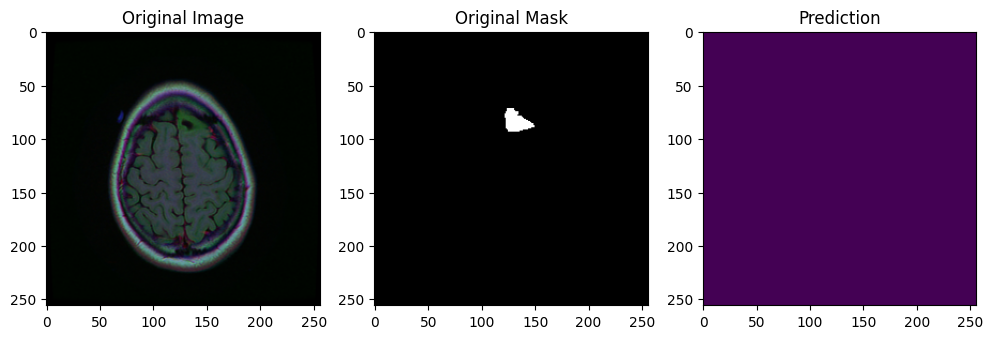

1/1 [==============================] - 0s 19ms/step


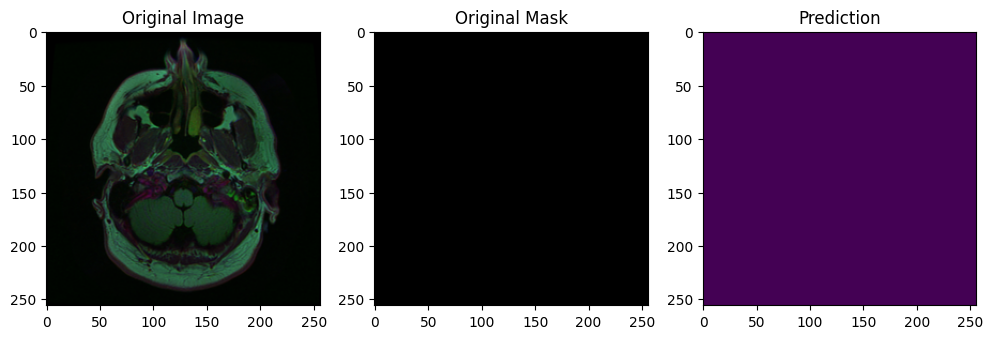

1/1 [==============================] - 0s 19ms/step


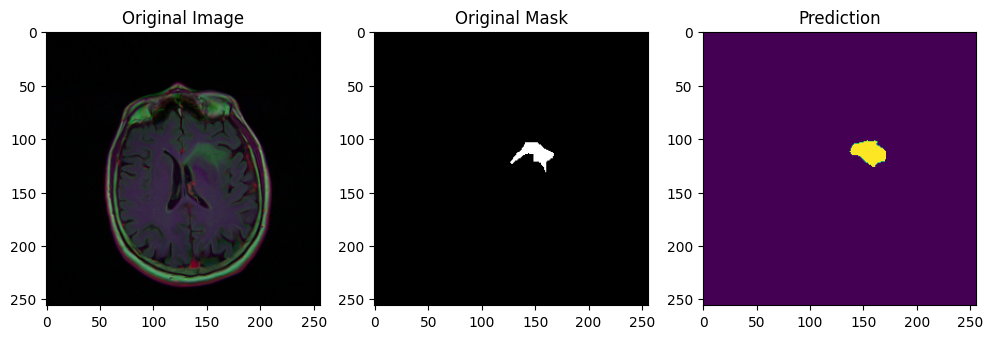

1/1 [==============================] - 0s 20ms/step


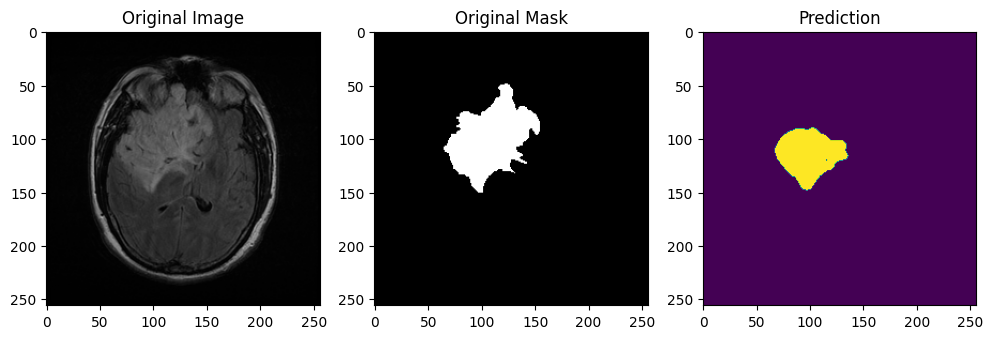

1/1 [==============================] - 0s 19ms/step


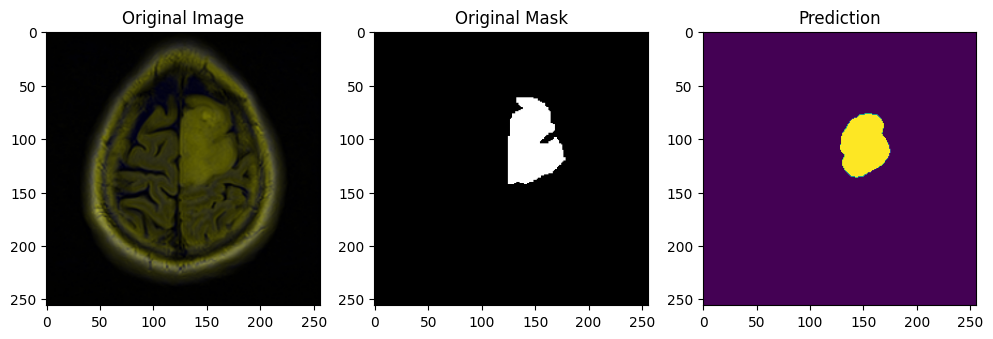

1/1 [==============================] - 0s 20ms/step


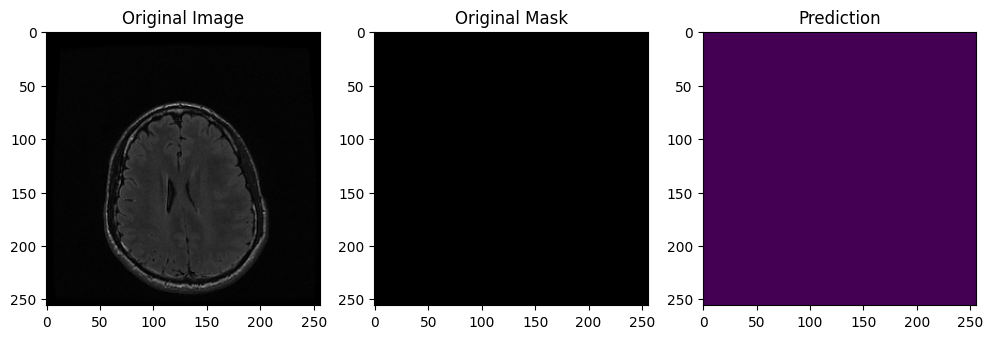

1/1 [==============================] - 0s 20ms/step


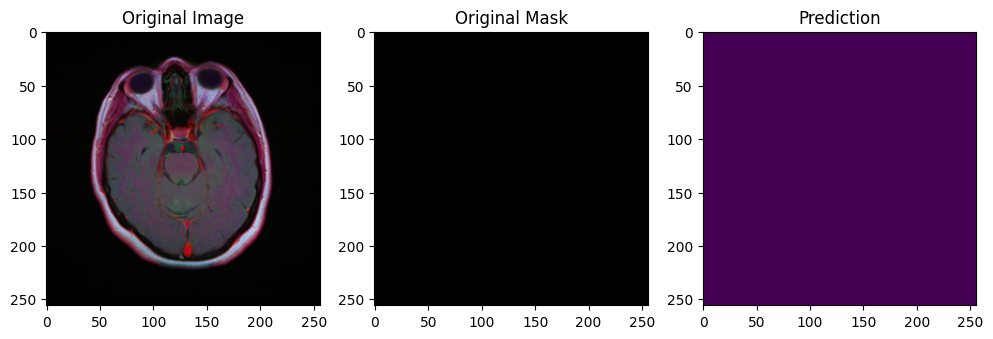

1/1 [==============================] - 0s 20ms/step


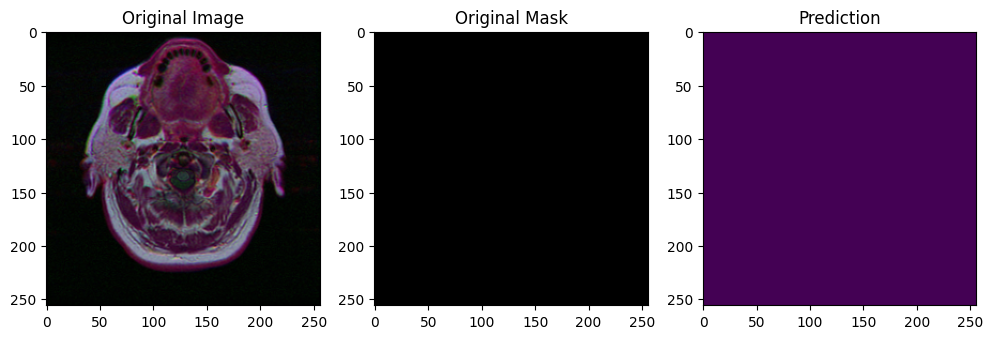

1/1 [==============================] - 0s 20ms/step


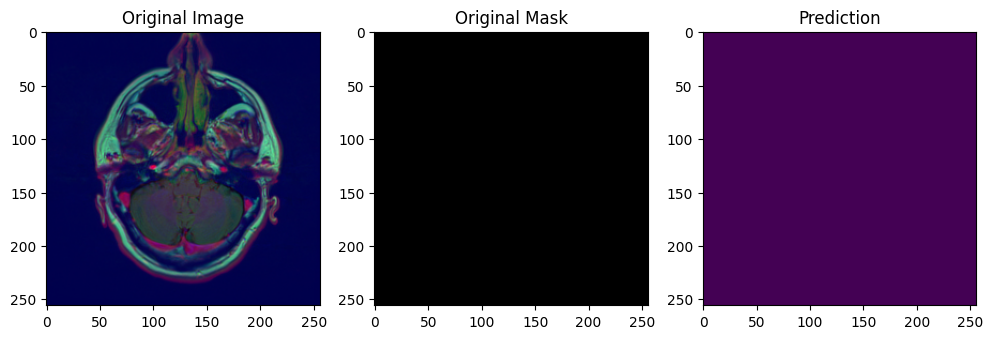

1/1 [==============================] - 0s 19ms/step


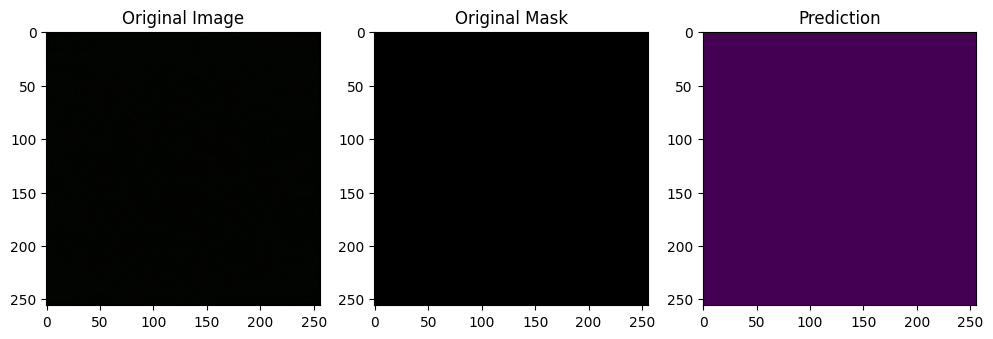

1/1 [==============================] - 0s 19ms/step


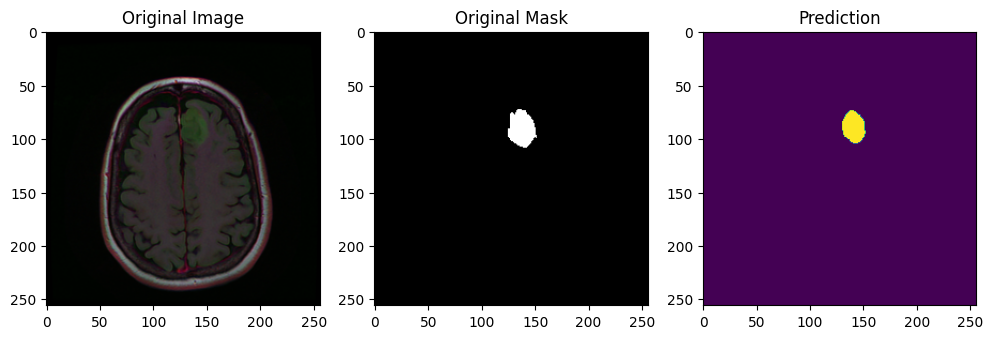

1/1 [==============================] - 0s 20ms/step


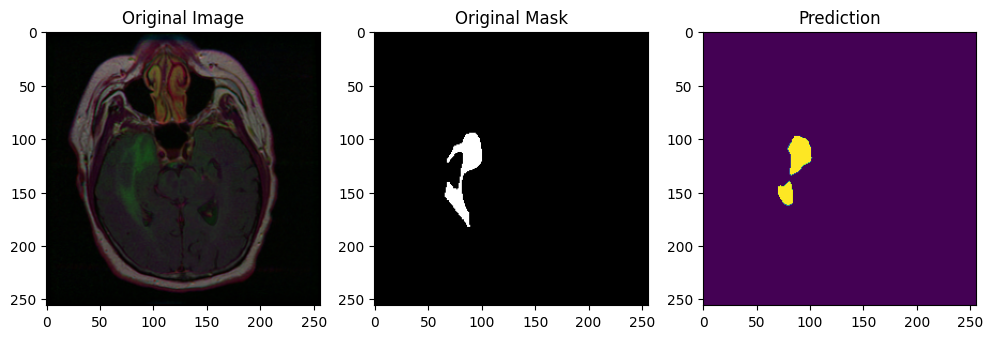

1/1 [==============================] - 0s 26ms/step


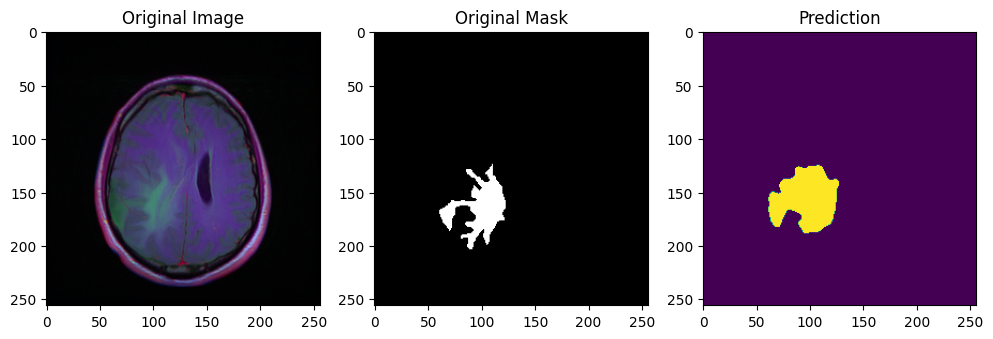

1/1 [==============================] - 0s 35ms/step


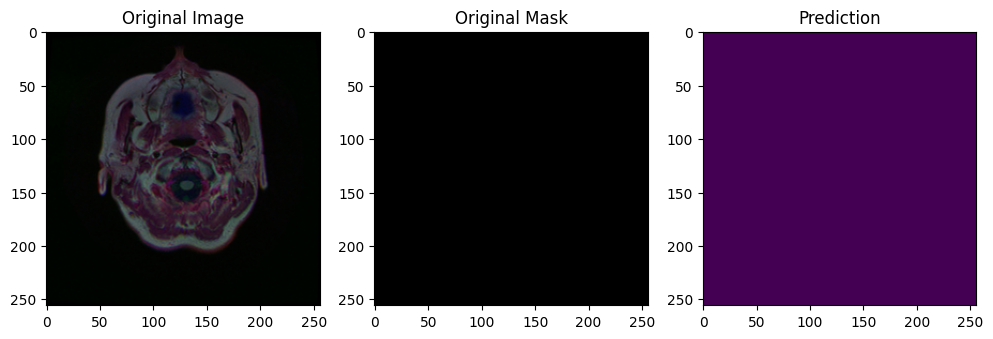

1/1 [==============================] - 0s 33ms/step


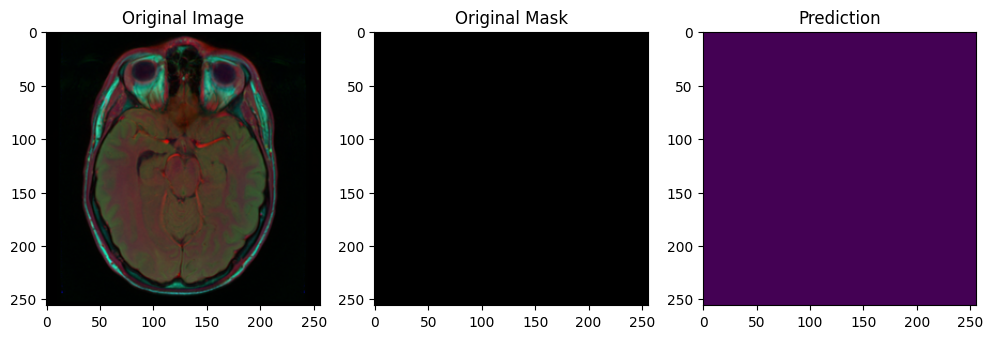

1/1 [==============================] - 0s 30ms/step


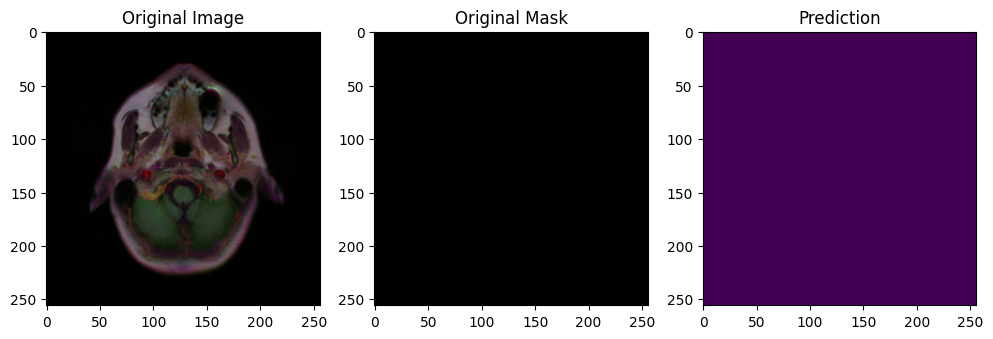

1/1 [==============================] - 0s 31ms/step


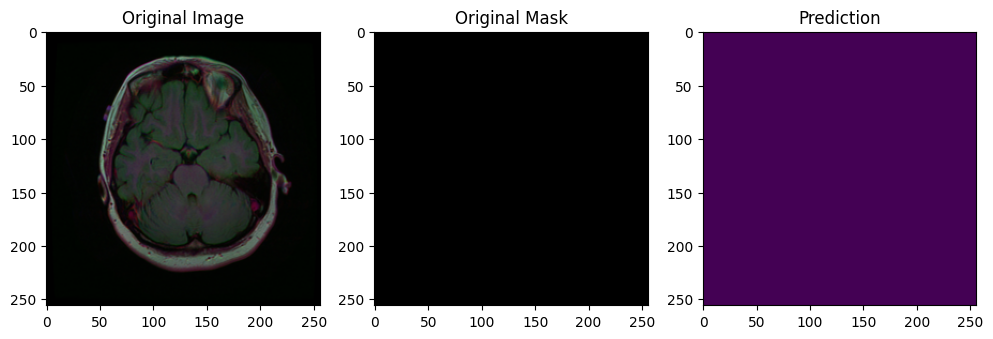

1/1 [==============================] - 0s 19ms/step


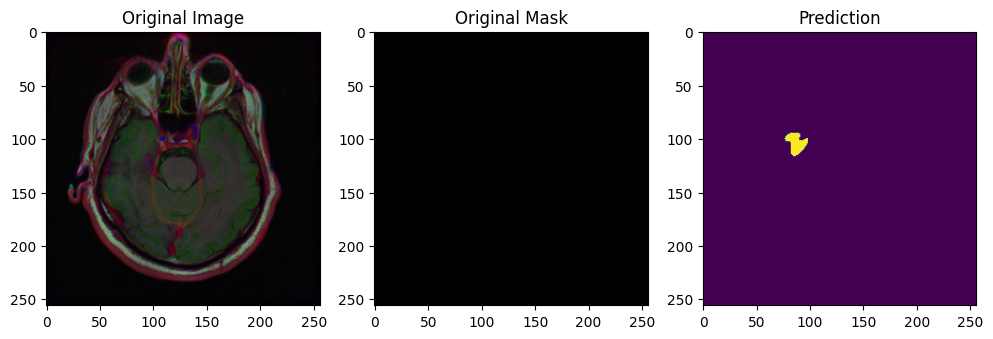

1/1 [==============================] - 0s 26ms/step


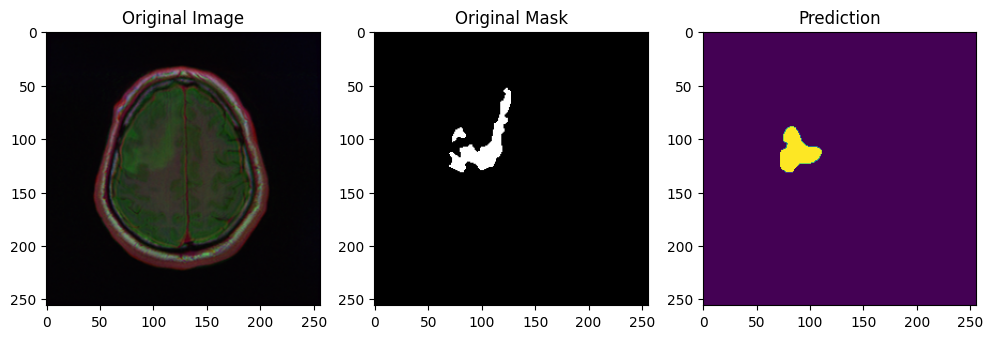

1/1 [==============================] - 0s 20ms/step


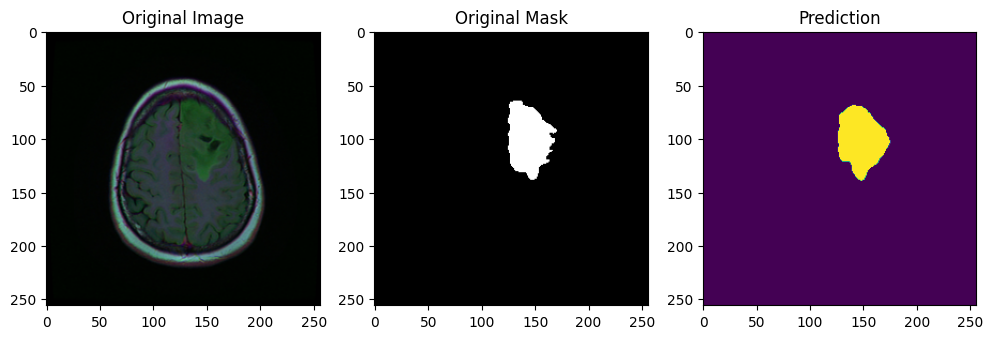

1/1 [==============================] - 0s 20ms/step


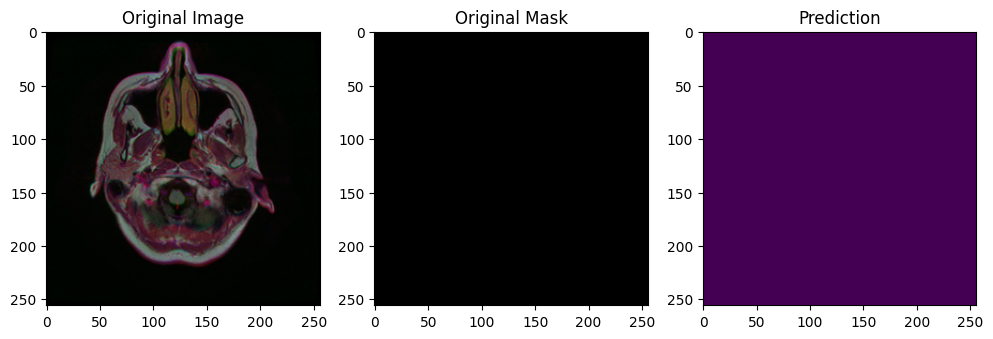

1/1 [==============================] - 0s 22ms/step


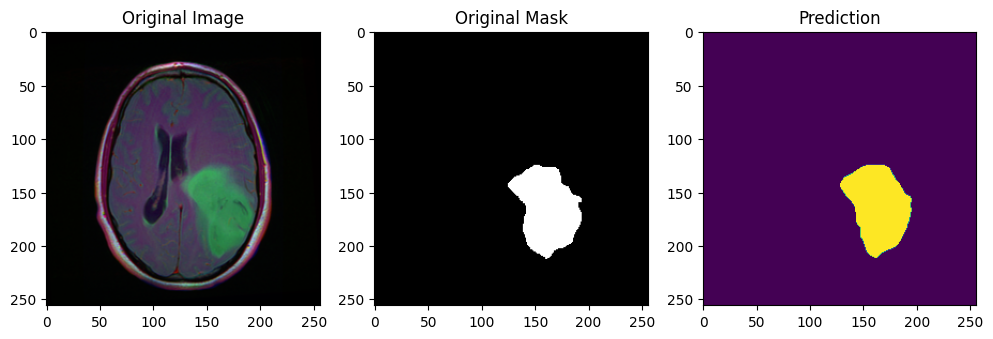

1/1 [==============================] - 0s 23ms/step


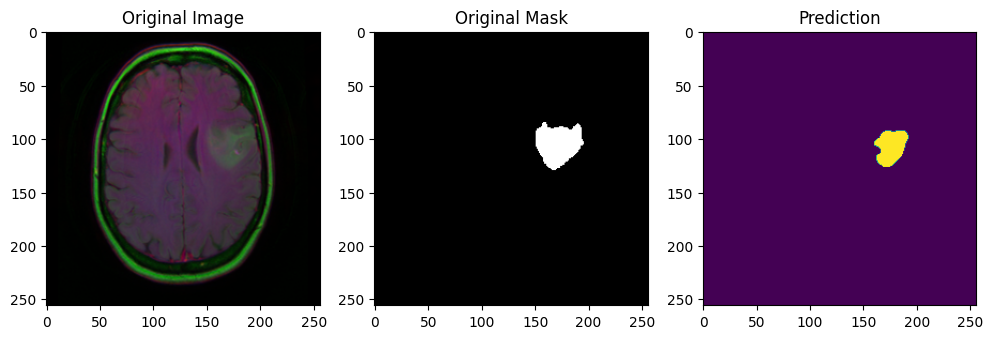

1/1 [==============================] - 0s 24ms/step


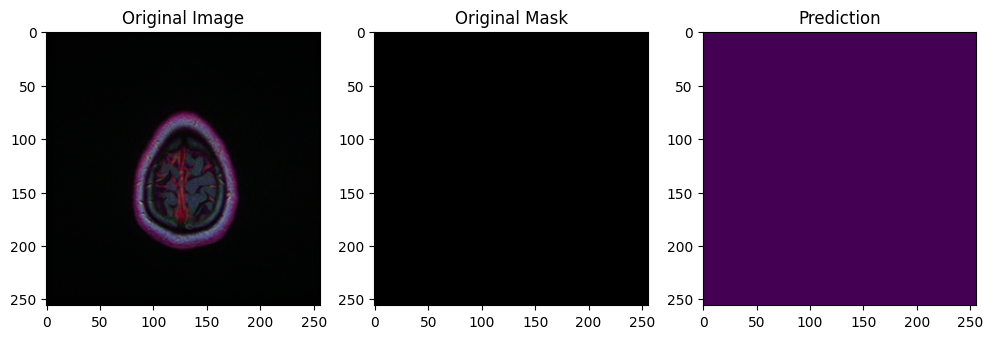

1/1 [==============================] - 0s 24ms/step


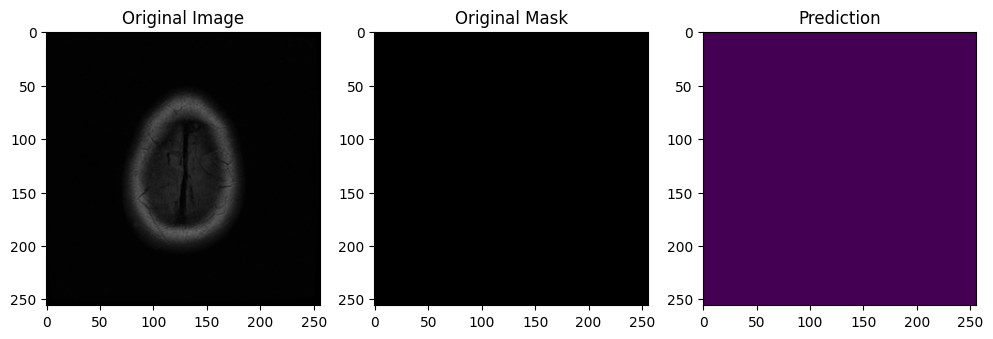

1/1 [==============================] - 0s 20ms/step


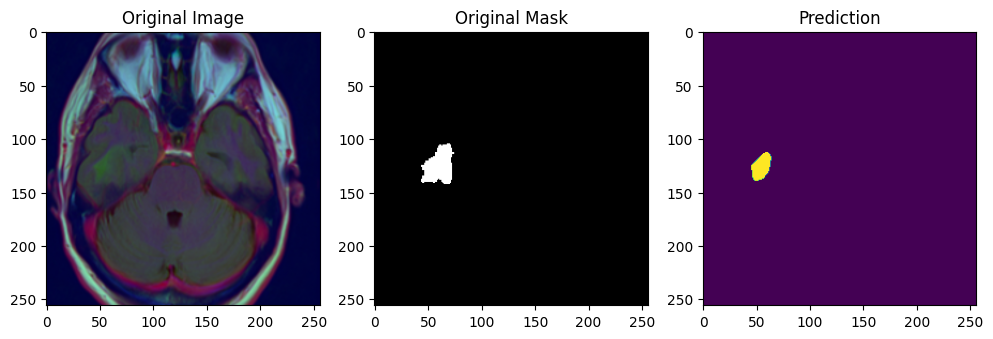

1/1 [==============================] - 0s 27ms/step


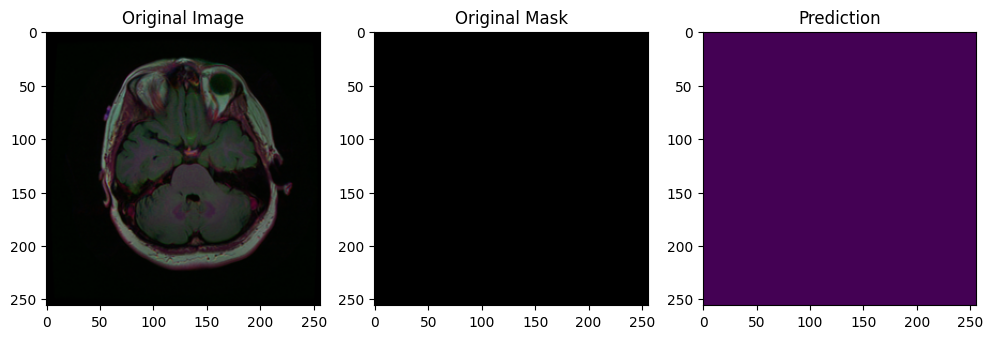

1/1 [==============================] - 0s 29ms/step


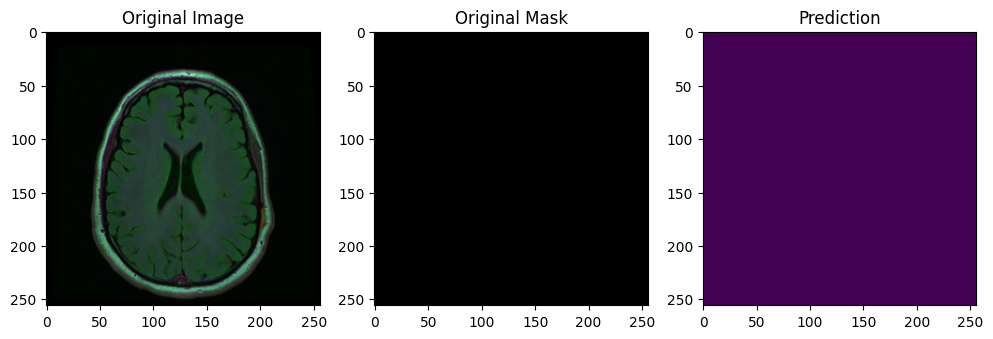

1/1 [==============================] - 0s 26ms/step


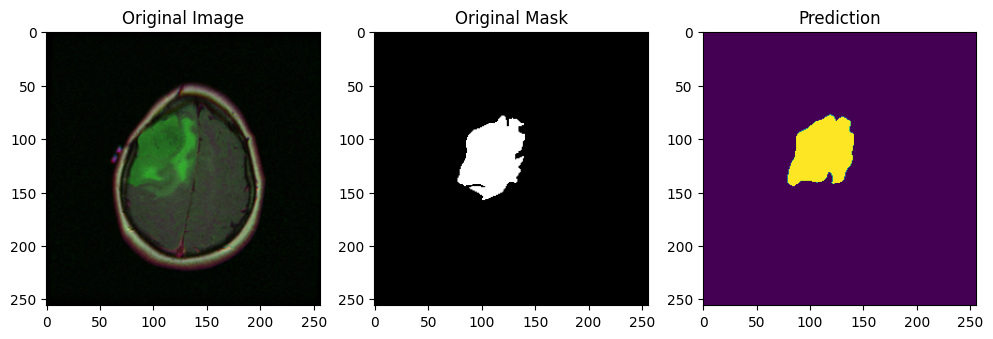

1/1 [==============================] - 0s 26ms/step


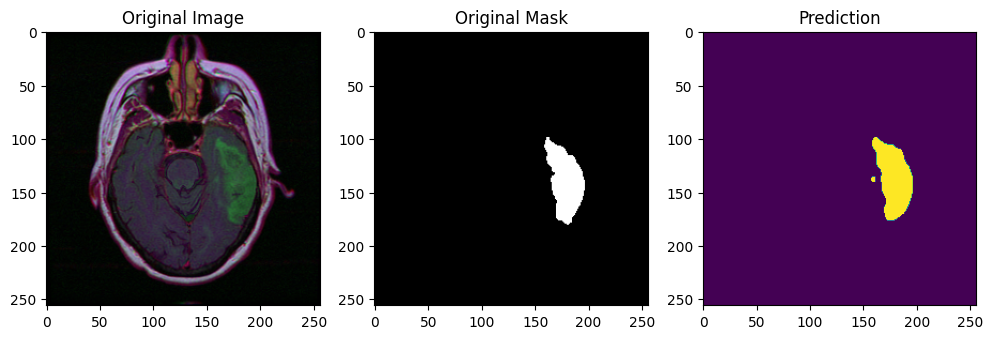

In [35]:

import cv2

for i in range(30):
    index=np.random.randint(1,len(df_test.index))
    img = cv2.imread(df_test['filename'].iloc[index])
    img = cv2.resize(img ,(im_height, im_width))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(df_test['mask'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()